In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
course_tags = pd.read_csv("course_tags.csv")
user_assessment_scores = pd.read_csv("user_assessment_scores.csv")
user_course_views = pd.read_csv("user_course_views.csv")
user_interests = pd.read_csv("user_interests.csv")
user_course_views.head(5)

user_handle   view_date                                       course_id  \
0            1  2017-06-27         cpt-sp2010-web-designers-branding-intro   
1            1  2017-06-28         cpt-sp2010-web-designers-branding-intro   
2            1  2017-06-28                    cpt-sp2010-web-designers-css   
3            1  2017-07-27                    cpt-sp2010-web-designers-css   
4            1  2017-09-12  aws-certified-solutions-architect-professional   

   author_handle         level  view_time_seconds  
0            875      Beginner               3786  
1            875      Beginner               1098  
2            875  Intermediate               4406  
3            875  Intermediate                553  
4            281      Advanced                102

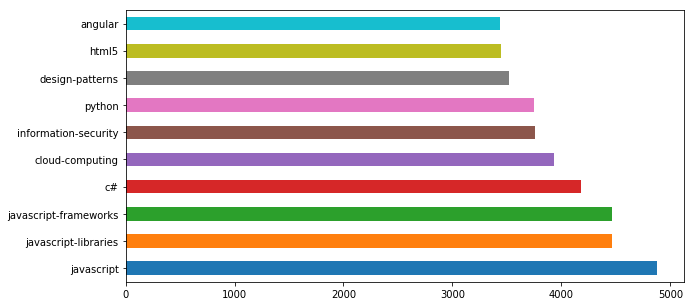

In [33]:
# most interesting tags
tags = user_interests["interest_tag"].value_counts()
top10_tags = tags.sort_values(ascending=False)[:10]
top10_tags.plot(kind="barh", figsize=(10,5))

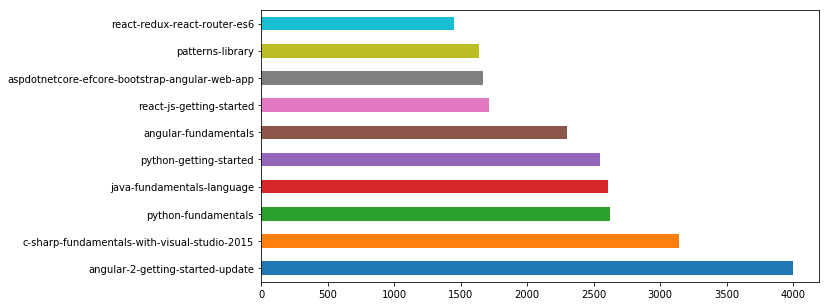

In [35]:
# most viewd courses at different levels
views = user_course_views["course_id"].value_counts()
top10_courses = views.sort_values(ascending = False)[:10]
top10_courses.plot(kind="barh", figsize=(10,5))

In [49]:
grouped_views = user_course_views.groupby(by = ['level','course_id'], as_index=False)['user_handle'].count()
grouped_views = grouped_views.sort_values(by=["level", 'user_handle'], ascending = False)


In [117]:
int_level = grouped_views[grouped_views['level'] == 'Intermediate'][:10].drop(['level'], axis=1)
adv_level = grouped_views[grouped_views['level'] == 'Advanced'][:10].drop(['level'], axis=1)
beg_level = grouped_views[grouped_views['level'] == 'Beginner'][:10].drop(['level'], axis=1)

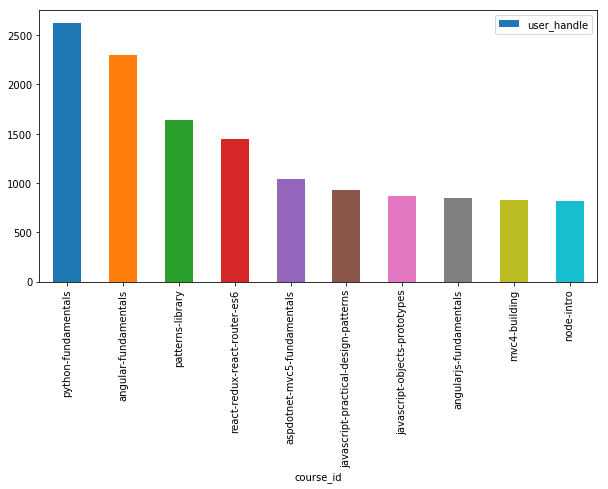

In [123]:
int_level.plot.bar( y = 'user_handle', x = 'course_id', figsize=(10,5))

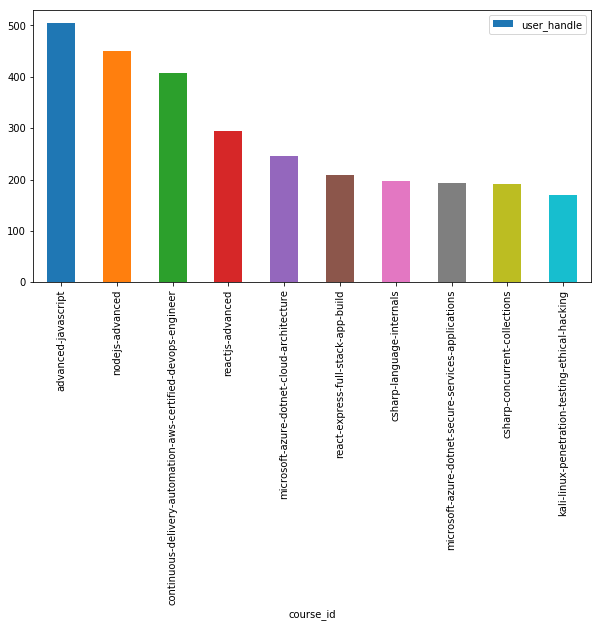

In [124]:
adv_level.plot.bar( y = 'user_handle', x = 'course_id', figsize=(10,5))

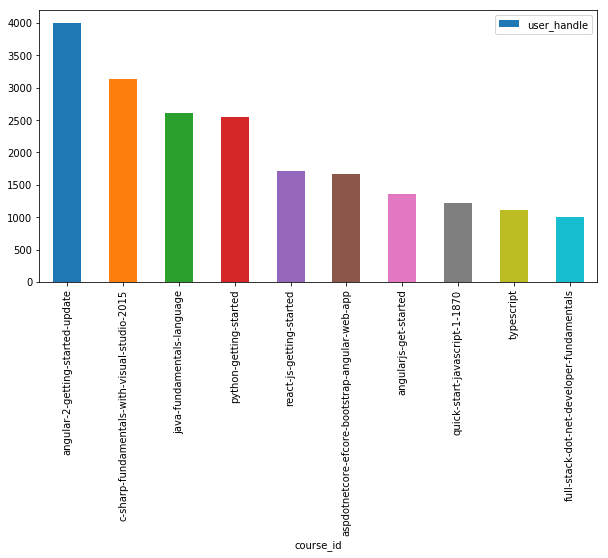

In [125]:
beg_level.plot.bar( y = 'user_handle', x = 'course_id', figsize=(10,5))

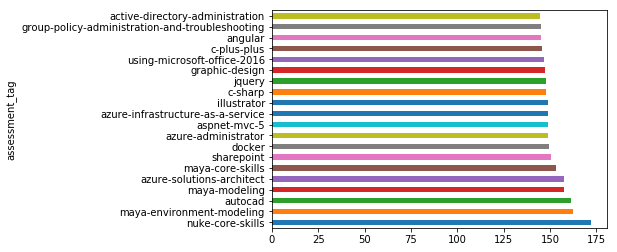

In [147]:
# mean performance at different levels - best aessessment tags - translates to easy courses or effective courses

means = user_assessment_scores.groupby(by=['assessment_tag'])['user_assessment_score'].mean().sort_values(ascending=False)
means[:20].plot(kind='barh')

In [156]:
course_dict = dict(zip(course_tags['course_id'], course_tags['course_tags']))

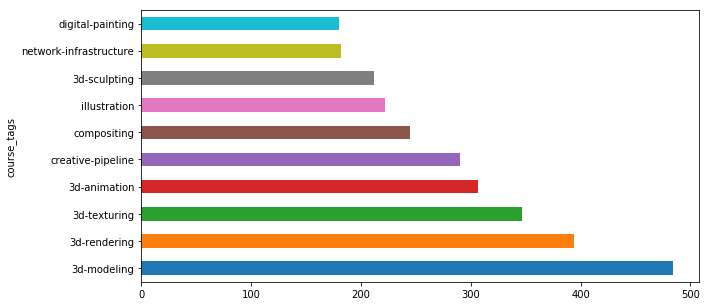

In [170]:
ctags = course_tags.groupby(by=['course_tags'])['course_id'].count().sort_values(ascending=False)
ctags[:10].plot(kind='barh', figsize=(10,5)) # so many modelling and animation courses!

In [177]:
# need few counts before joining and pivoting
#user_course_views.isnull().values.any()
tot_course_ids = len(user_course_views.course_id.unique())
tot_users = len(user_course_views.user_handle.unique())
tot_tags = len(course_tags.course_tags.unique())

In [178]:
tot_course_ids, tot_users, tot_tags

(5942, 8760, 999)

In [181]:
inv_cdict = dict()
for key, val in course_dict.items():
    if inv_cdict.get(val) is None:
        inv_cdict[val] = []
    inv_cdict[val].append(key)
#inv_cdict

In [182]:
course_tags.head(5)

course_id       course_tags
0  12-principles-animation-toon-boom-harmony-1475      2d-animation
1              2d-racing-game-series-unity-5-1312       game-design
2             2d-racing-games-unity-volume-2-1286          game-art
3             2d-racing-games-unity-volume-2-1286  digital-painting
4             2d-racing-games-unity-volume-2-1286     image-editing

In [183]:
user_assessment_scores.head(5)

user_handle assessment_tag user_assessment_date  user_assessment_score
0         7487     angular-js  2017-08-11 19:03:38                    134
1         7487            css  2017-08-11 20:09:56                     38
2         7487          html5  2017-07-31 18:59:37                     84
3         7487           java  2017-07-31 18:49:27                    149
4         7487     javascript  2017-07-31 19:05:03                     92

In [184]:
user_interests.head(5)

user_handle      interest_tag        date_followed
0            1   mvc-scaffolding  2017-06-27 16:26:52
1            1              mvc2  2017-06-27 16:26:52
2            1  mvc-html-helpers  2017-06-27 16:26:52
3            1          mvc4-ioc  2017-06-27 16:26:52
4            1       mvc-testing  2017-06-27 16:26:52

In [187]:
user_course_views.head(5)

user_handle   view_date                                       course_id  \
0            1  2017-06-27         cpt-sp2010-web-designers-branding-intro   
1            1  2017-06-28         cpt-sp2010-web-designers-branding-intro   
2            1  2017-06-28                    cpt-sp2010-web-designers-css   
3            1  2017-07-27                    cpt-sp2010-web-designers-css   
4            1  2017-09-12  aws-certified-solutions-architect-professional   

   author_handle         level  view_time_seconds  
0            875      Beginner               3786  
1            875      Beginner               1098  
2            875  Intermediate               4406  
3            875  Intermediate                553  
4            281      Advanced                102

In [188]:
merged_df = pd.merge(user_course_views, user_interests, on='user_handle', sort=True, how='left')

In [189]:
merged_df = pd.merge(merged_df,user_assessment_scores, on='user_handle', sort=True, how='left')

In [190]:
merged_df = pd.merge(merged_df, course_tags, on='course_id', sort=True, how='left')

In [204]:
len(user_assessment_scores.user_handle.unique())

3114